# Name - Shrimani Tundurwar
## Prediction Using Supervised Learning

Importing Required Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Data from the given url

In [8]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [11]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Now let's use scatter plot to visualize our data

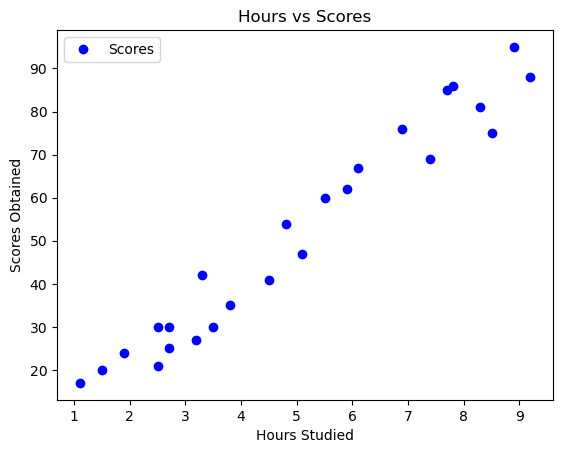

In [20]:
df.plot("Hours", "Scores", color='blue', style ="o")

# Title and labels
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')

plt.show()

We can see from the above plot that the hours studied and the scores obtained shows positive linear relation. As the study hours increases the marks obtained by any student increases.

### Data Preparation

Here we assign the input and output variables for our model. As per our dataset we want to predict the marks obtained by any student based on the hours he spends on studying. So our input variable "X" is "Hours" and output variable "y" is "Scores".

In [43]:
X = df.iloc[:,:1].values
y = df.iloc[:,1].values
print("Hours:",X)
print("Scores:",y)

Hours: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Scores: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the data

Now before applying the linear regression model we need to first split the data into training and test dataset which will be used to train and test our model. Here we are using Scikit-Learn's built-in train_test_split() method:

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

"test_size" parameter in the above method splits the data based on percentage i.e. here the data split is 25% test and 75% training data

In [50]:
print("Training data (X_train):", X_train)
print("Training labels (y_train):", y_train)
print("Test data (X_test):", X_test)
print("Test labels (y_test):", y_test)

Training data (X_train): [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
Training labels (y_train): [86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
Test data (X_test): [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
Test labels (y_test): [20 27 69 30 62 35 24]


### Model Training

In [51]:
from sklearn.linear_model import LinearRegression
#linear regression model
model = LinearRegression()
#Training the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

### Model Predictions

In [53]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


The above result shows the predictions for the test data. Now let's compare predictions with the actual data.

In [56]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Let's Visualize our model as per the test data

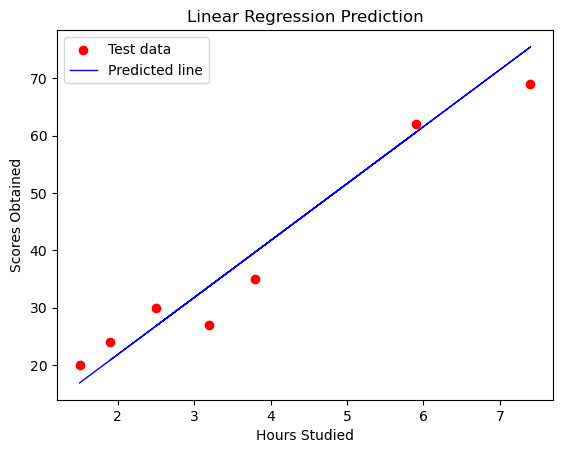

In [58]:
# Plot outputs
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, y_pred, color='blue', linewidth=1, label='Predicted line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

### Testing our model for new values

In [61]:
hours = np.array([[9.25]])
new_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


This shows that if a student studies for 9.25 hours he could score 94 marks in the exam.

### Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Print model performance metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [9.94167834]
Intercept: 1.9322042531516601
Mean squared error (MSE): 20.33
Coefficient of determination (R^2): 0.94


Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values indicate better model performance.
Coefficient of Determination (R²): Represents the proportion of variance in the dependent variable (scores) that is predictable from the independent variable (hours studied). Higher values (closer to 1.0) indicate a better fit.

# THANK YOU!